<a href="https://colab.research.google.com/github/ahra3/plants-computer-vision/blob/main/YOLO_CUSTOM_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train YOLOv8 On a Custom Dataset

## How to train YOLOv8 object detection on a custom dataset

In [ ]:
! nvidia-smi

Fri Nov 28 22:56:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.2 MB/s eta 0:00:00


### Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image, clear_output
clear_output()
!yolo checks

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.6/112.6 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   38.6/112.6 GB
CPU                    Intel Xeon CPU @ 2.20GHz
CPU count              2
GPU                    Tesla T4, 15095MiB
GPU count              1
CUDA                   12.6

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-python          ✅ 4.12.0.88>=4.6.0
pillow                 ✅ 11.3.0>=7.1.2
pyyaml                 ✅ 6.0.3>=5.3.1
requests               ✅ 2.32.4>=2.23.0
scipy                  ✅ 1.16.3>=1.4.1
torch                  ✅ 2.9.0+cu126>=1.8.0
torch                  ✅ 2.9.0+cu126!=2.4.0,>=1.8.0; sys_platform == "win32"


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IjZg3dEbhwnqArL5My7B")
project = rf.workspace("mine-wgla3").project("plants-hpkup")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
! yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/plants-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

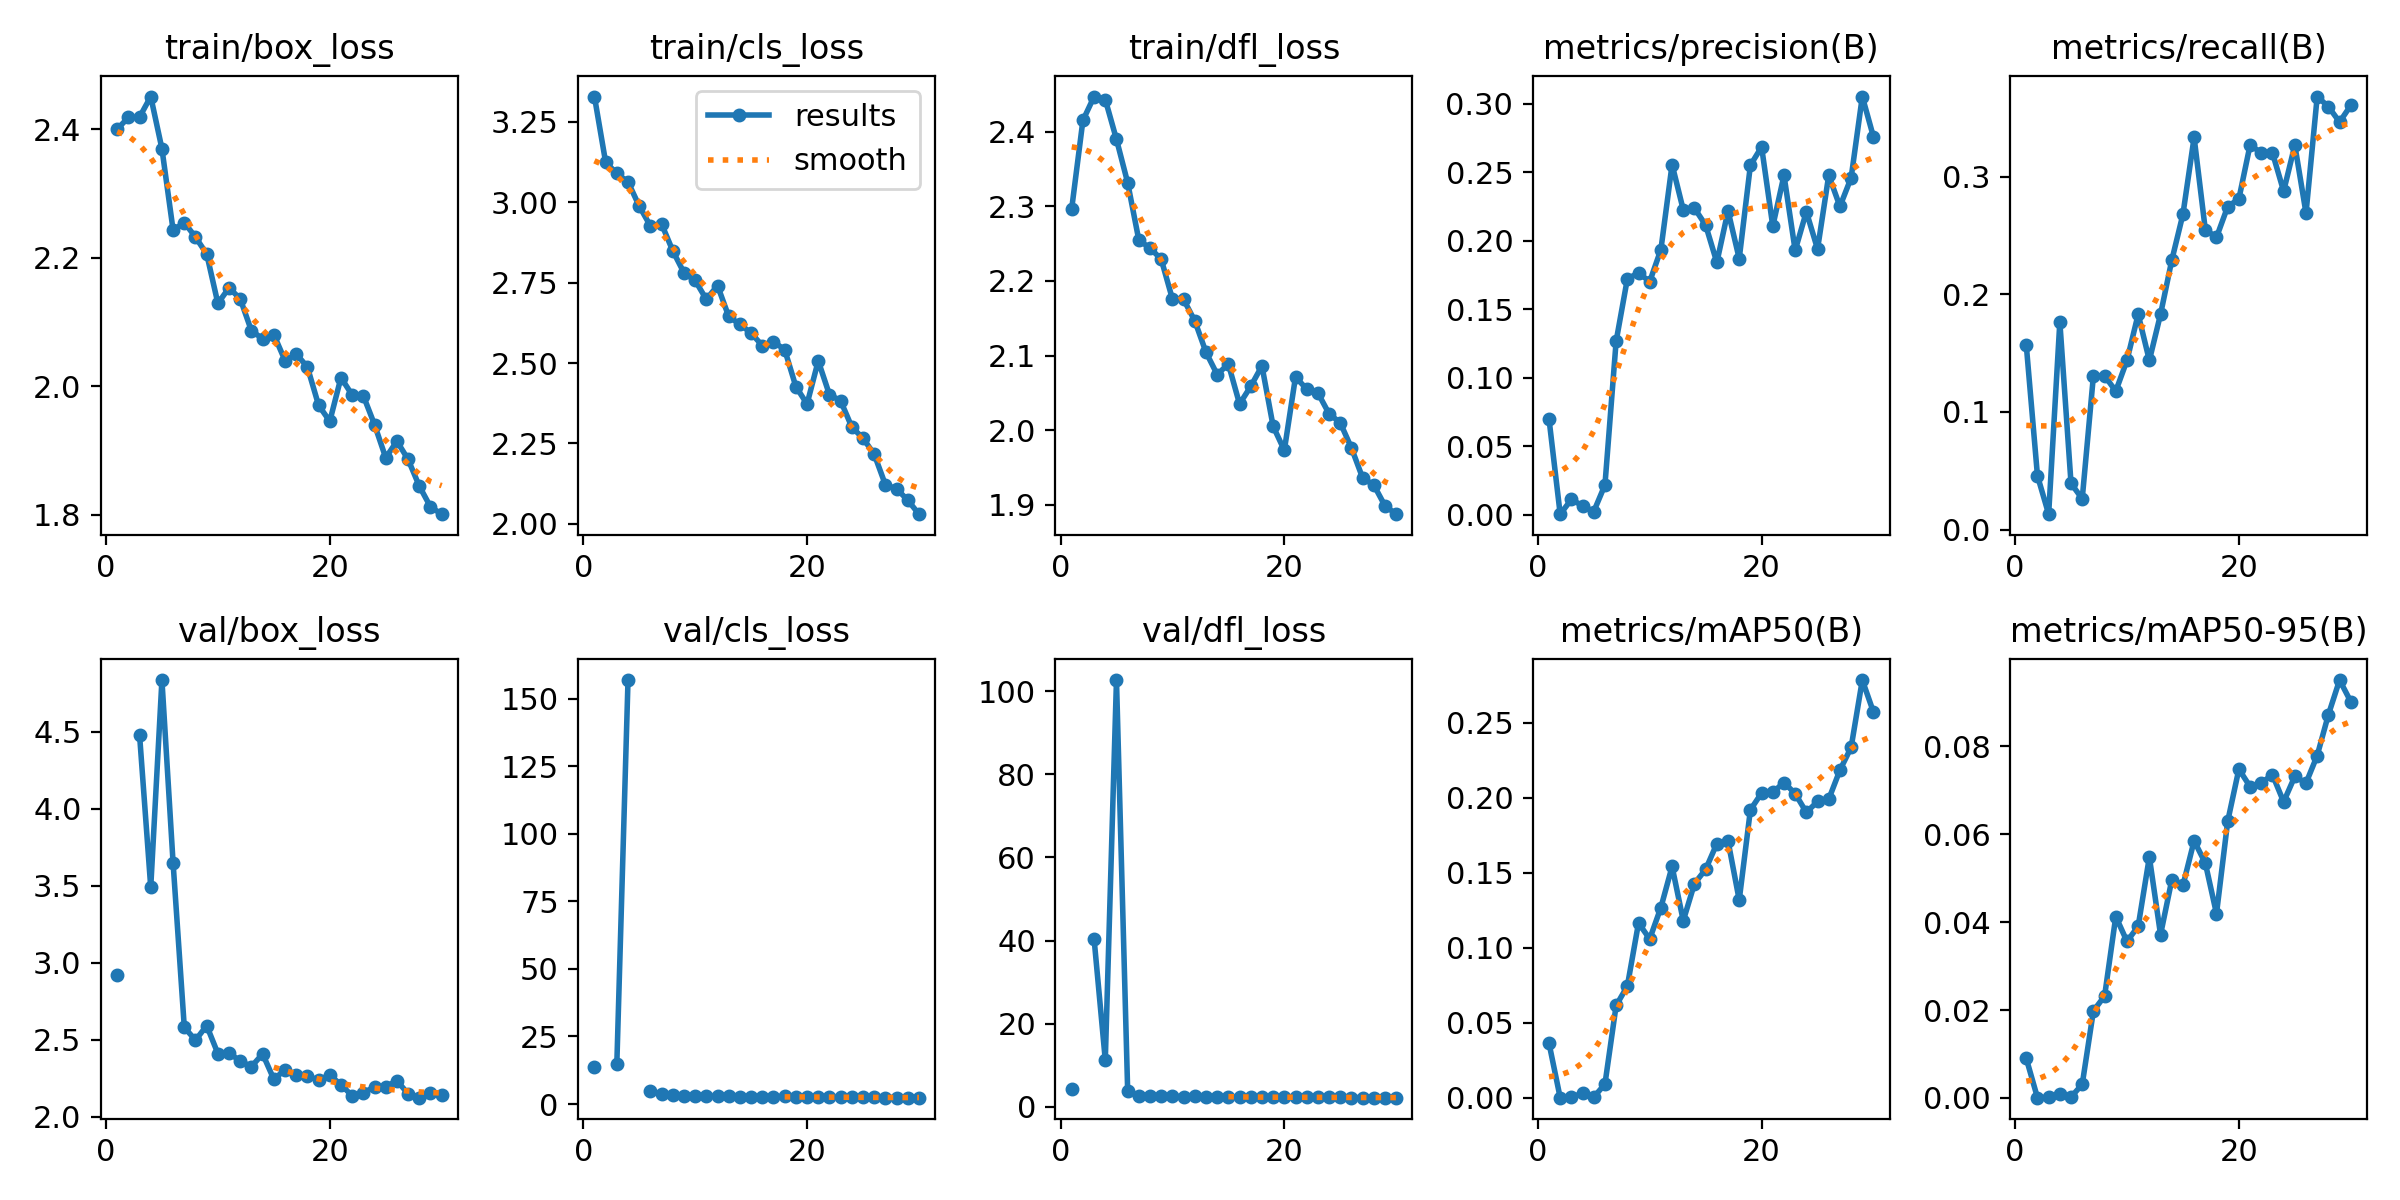

In [ ]:
Image(filename=f'/content/runs/detect/train5/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2348.0±830.3 MB/s, size: 69.7 KB)
val: Scanning /content/plants-3/valid/labels.cache... 85 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 85/85 1.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.2it/s 2.7s
                   all         85        153      0.303      0.346      0.278     0.0949
Speed: 4.3ms preprocess, 19.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/10 /content/plants-3/test/images/009_d90b1349_jpg.rf.c2d97bba381a20a73dc6a0b8a4adfc43.jpg: 640x640 (no detections), 37.0ms
image 2/10 /content/plants-3/test/images/051_c0b288fb_jpg.rf.529ed41b40e71238788834b6528956b9.jpg: 640x640 (no detections), 36.9ms
image 3/10 /content/plants-3/test/images/054_6172309a_jpg.rf.618a563256f0084013c4437bb9c19a85.jpg: 640x640 1 Blight, 36.9ms
image 4/10 /content/plants-3/test/images/065_06250ce6_jpg.rf.6d6694c1a1bd9c1ff32e8af2d5ca0deb.jpg: 640x640 (no detections), 37.0ms
image 5/10 /content/plants-3/test/images/125_8d413564_jpg.rf.7207c6668fd25b079a5d917bf4356a6a.jpg: 640x640 2 Blights, 36.8ms
image 6/10 /content/plants-3/test/images/213_cde0ce86_jpg.rf.9e670a1073654729d9e944c030b06a5c.jpg: 640x640 2 Blights, 26.8ms
image 7/10 /content/plants-3/test/images/leafblight210_jpeg_jpg.rf.

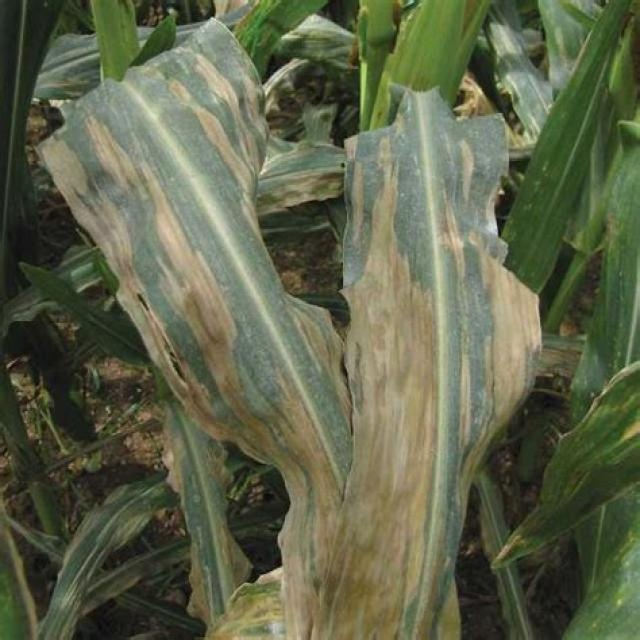

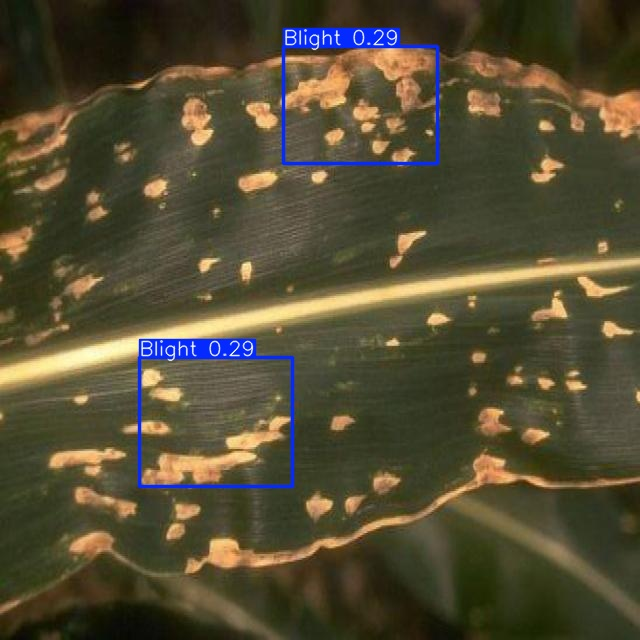

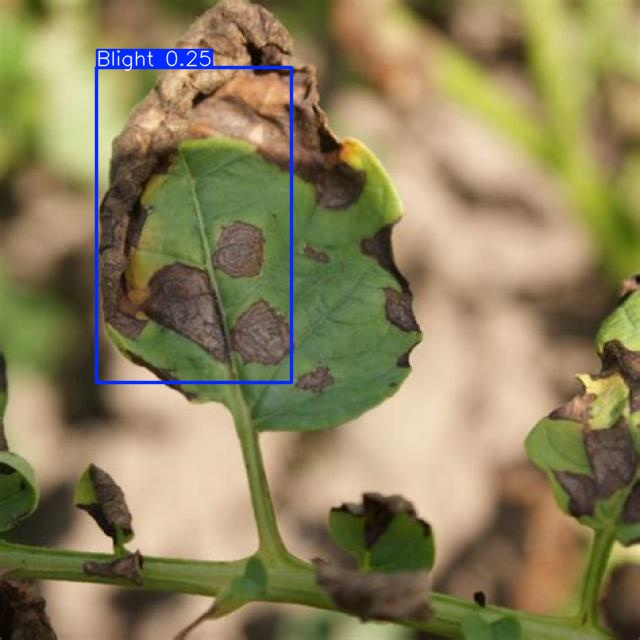

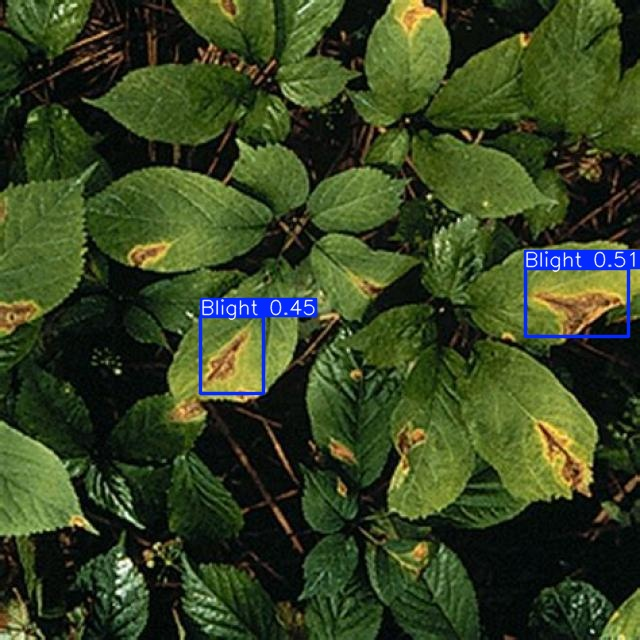

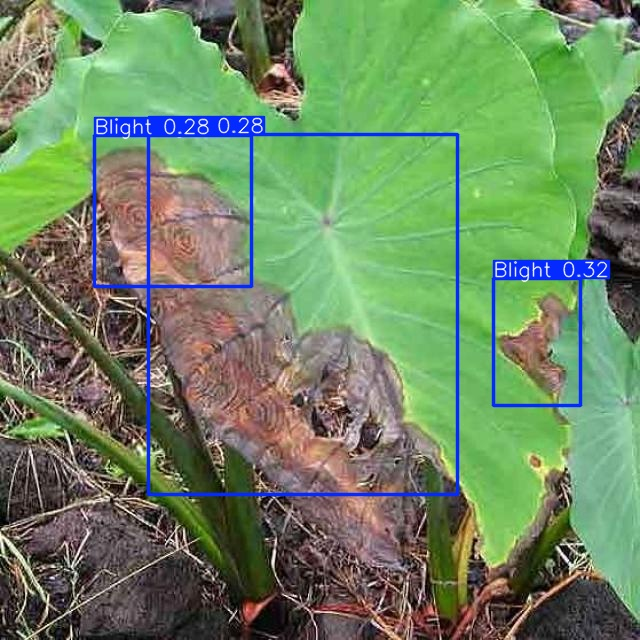

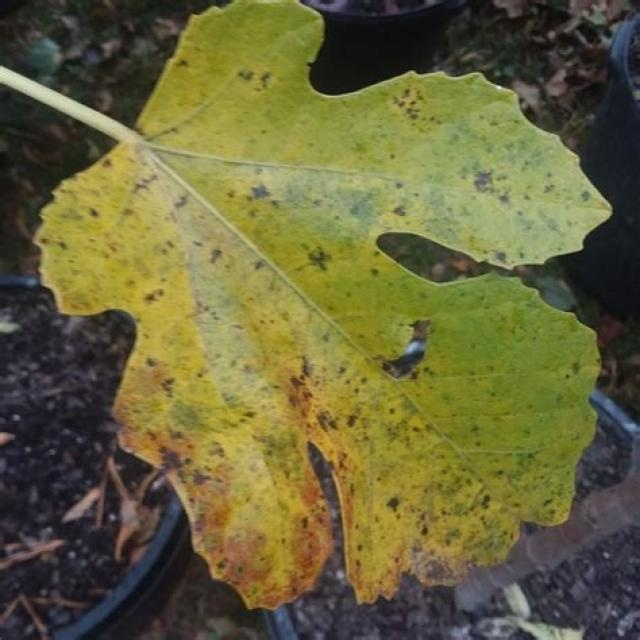

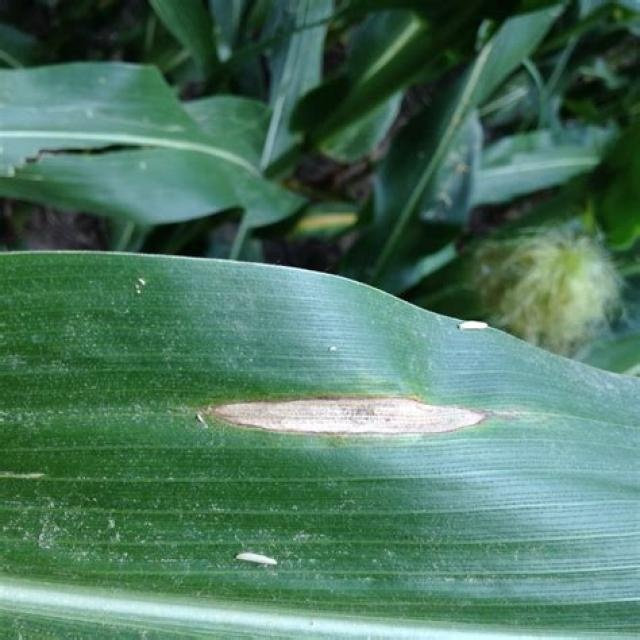

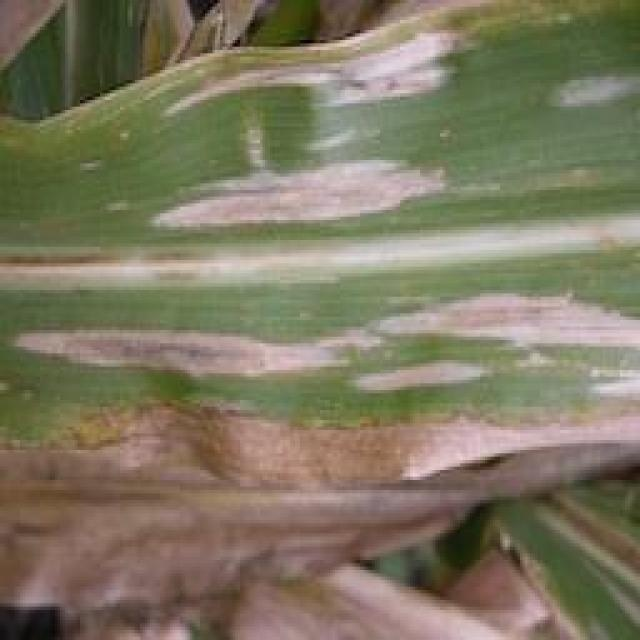

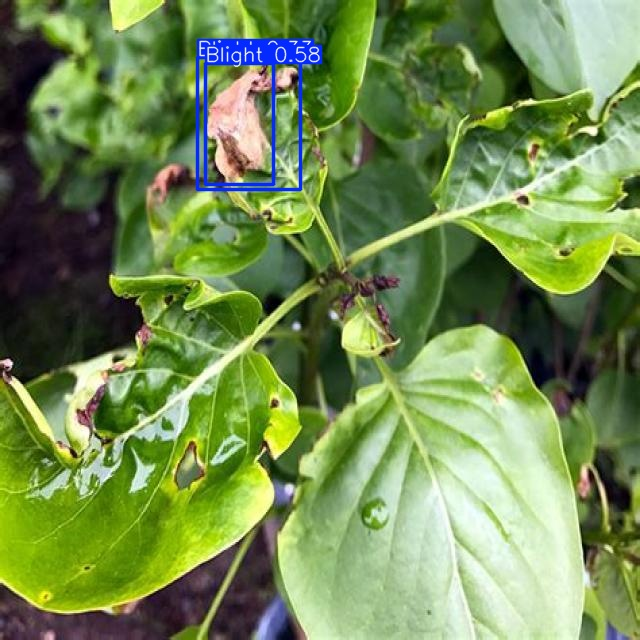

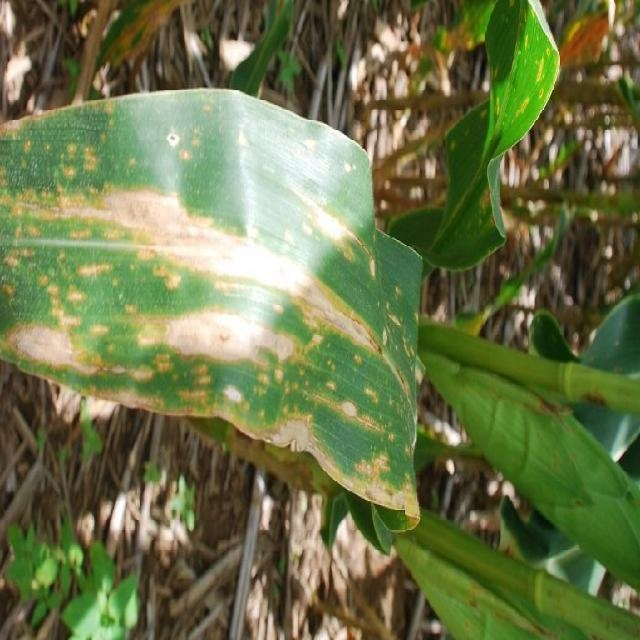

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/runs/detect/predict/*.jpg'): #assuming JPG
    display(Image(filename=imageName, height=600))
    print("\n")